In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,classification_report,r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression
import plotly.io as pio
pio.renderers.default = 'notebook'  # or 'iframe_connected'
pio.renderers.default = 'iframe_connected'

# Project 
## Hypertension Risk Prediction Analysis 

In [2]:
df=pd.read_csv(r"/kaggle/input/hypertension-risk-prediction-dataset/hypertension_dataset.csv")

# Data Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


In [4]:
print('Shape of the data:', df.shape)
print('Columns:', df.columns.tolist())
df.head()

Shape of the data: (1985, 11)
Columns: ['Age', 'Salt_Intake', 'Stress_Score', 'BP_History', 'Sleep_Duration', 'BMI', 'Medication', 'Family_History', 'Exercise_Level', 'Smoking_Status', 'Has_Hypertension']


,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


# Data Handling & Cleaning 

In [5]:
df["Medication"].value_counts()
df["Medication"]=df["Medication"].fillna("None")

In [6]:
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
Age                 0
Salt_Intake         0
Stress_Score        0
BP_History          0
Sleep_Duration      0
BMI                 0
Medication          0
Family_History      0
Exercise_Level      0
Smoking_Status      0
Has_Hypertension    0
dtype: int64


In [7]:
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,None,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,None,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,None,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


# EDA & Visualization 

In [8]:
import plotly.express as px

smoking_counts = df["Smoking_Status"].value_counts().reset_index()
smoking_counts.columns = ["Smoking_Status", "Count"]

fig = px.pie(smoking_counts, names="Smoking_Status", values="Count",
             title="Distribution of Smoking Status")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=True)

fig.show()

In [9]:
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,None,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,None,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,None,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


Text(0.5, 1.0, 'Age Brackets That Has Hyper Tension')

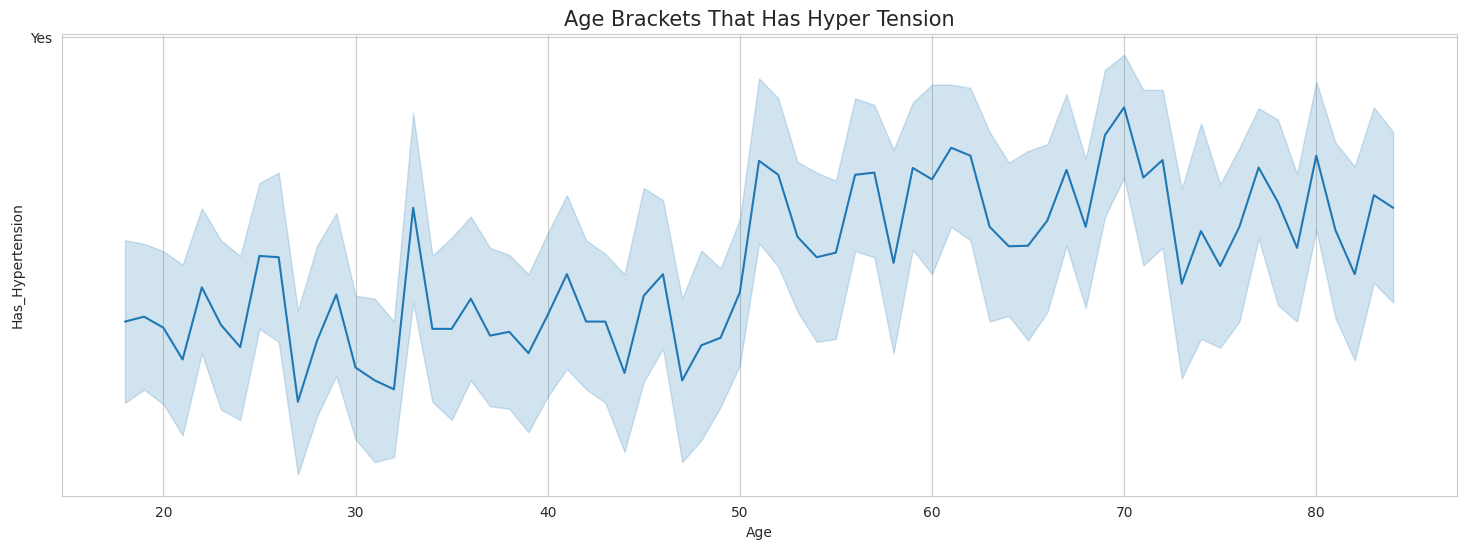

In [10]:
plt.figure(figsize=(18,6))
sns.set_style("whitegrid")
sns.lineplot(data=df,x="Age",y="Has_Hypertension")
plt.title("Age Brackets That Has Hyper Tension",size=15)

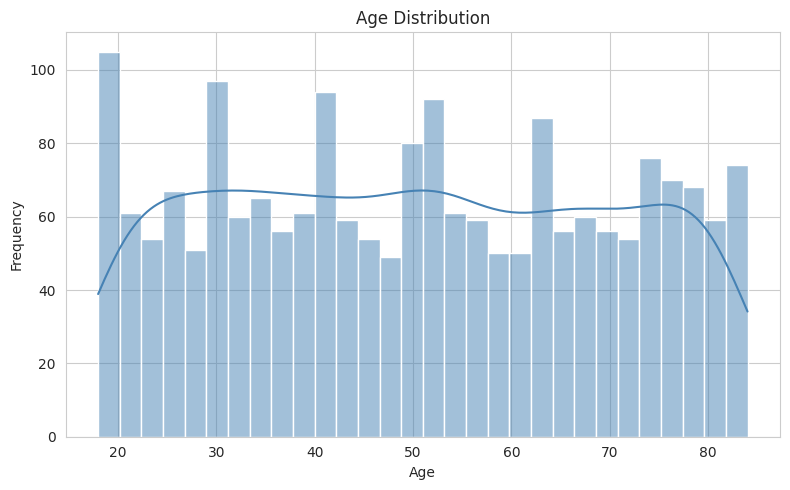

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True, color="steelblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [12]:
import plotly.express as px

smoke_htn = df.groupby("Smoking_Status")["Has_Hypertension"].value_counts().unstack().fillna(0)
smoke_htn = smoke_htn.reset_index()
fig = px.bar(smoke_htn, x="Smoking_Status", y=["Yes", "No"], barmode="group",
             title="Hypertension by Smoking Status")
fig.show()


In [13]:
fig = px.scatter(df, x="Sleep_Duration", y="Stress_Score", color="Has_Hypertension",
                 title="Sleep Duration vs Stress Score")
fig.show()


In [14]:
exercise_htn = df.groupby("Exercise_Level")["Has_Hypertension"].value_counts().unstack().fillna(0)
exercise_htn = exercise_htn.reset_index()
fig = px.bar(exercise_htn, x="Exercise_Level", y=["Yes", "No"], barmode="group",
             title="Hypertension by Exercise Level")
fig.show()


In [15]:
import plotly.express as px

fig = px.scatter(df, x="Age", y="BMI", color="Has_Hypertension",
                 title="BMI vs Age Colored by Hypertension Status",
                 size="Stress_Score", hover_data=["Salt_Intake", "Sleep_Duration"])
fig.show()


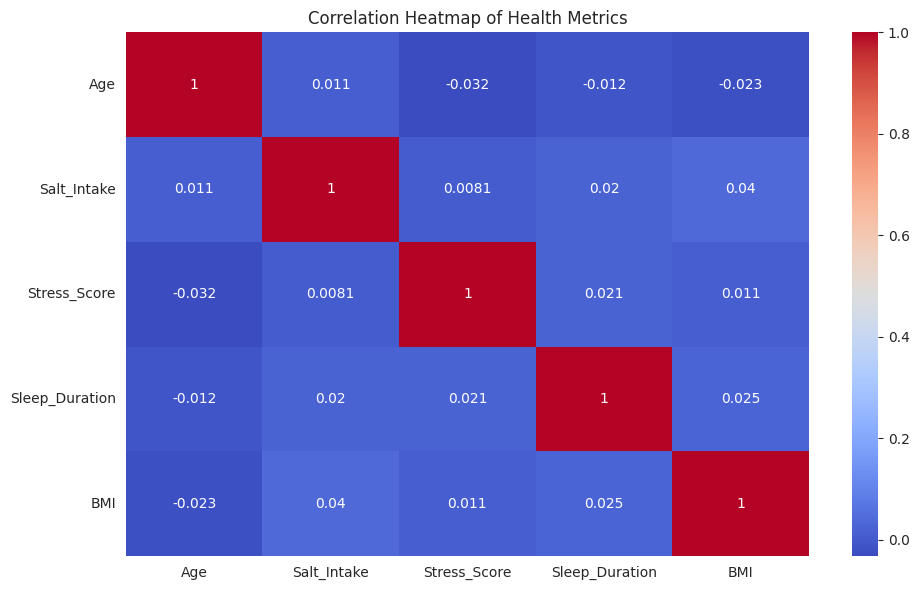

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Health Metrics")
plt.tight_layout()
plt.show()


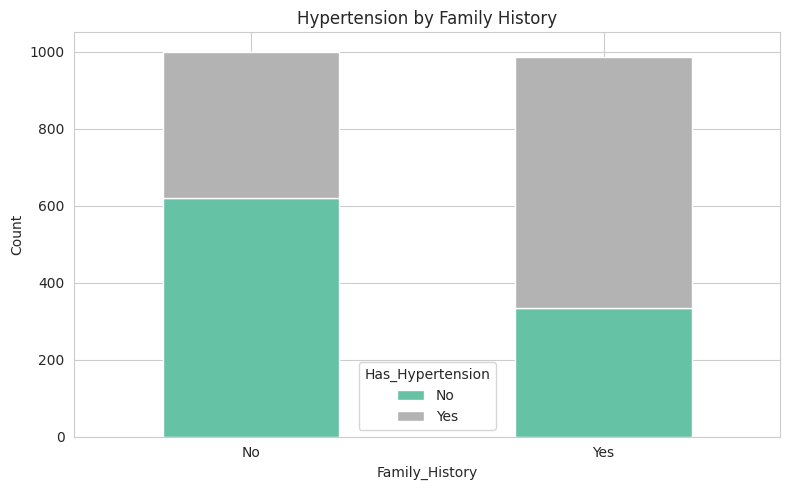

In [17]:
htn_family = df.groupby(["Family_History", "Has_Hypertension"]).size().unstack().fillna(0)
htn_family.plot(kind="bar", stacked=True, colormap="Set2", figsize=(8,5))
plt.title("Hypertension by Family History")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


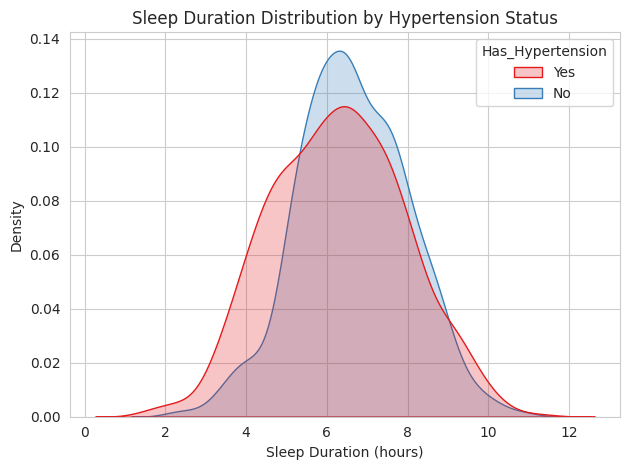

In [18]:
sns.kdeplot(data=df, x="Sleep_Duration", hue="Has_Hypertension", fill=True, palette="Set1")
plt.title("Sleep Duration Distribution by Hypertension Status")
plt.xlabel("Sleep Duration (hours)")
plt.tight_layout()
plt.show()


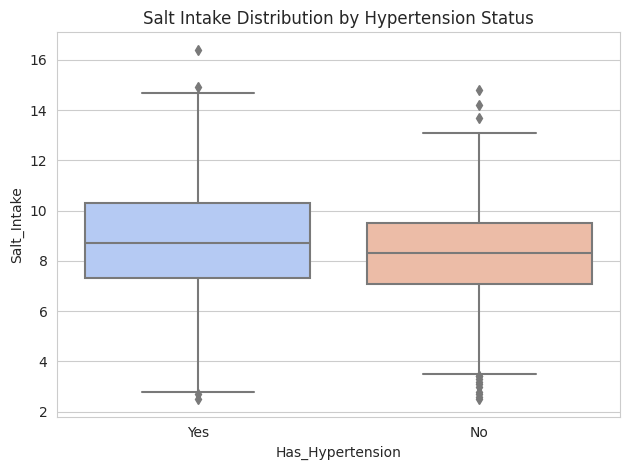

In [19]:
sns.boxplot(data=df, x="Has_Hypertension", y="Salt_Intake", palette="coolwarm")
plt.title("Salt Intake Distribution by Hypertension Status")
plt.tight_layout()
plt.show()


# Machine Learning

XGB Classifier Model 

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df_ml = df.copy()
for col in ["BP_History", "Medication", "Family_History", "Exercise_Level", "Smoking_Status", "Has_Hypertension"]:
    df_ml[col] = LabelEncoder().fit_transform(df_ml[col])

X = df_ml.drop(columns=["Has_Hypertension"])
y = df_ml["Has_Hypertension"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9874055415617129
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       192
           1       0.99      0.99      0.99       205

    accuracy                           0.99       397
   macro avg       0.99      0.99      0.99       397
weighted avg       0.99      0.99      0.99       397



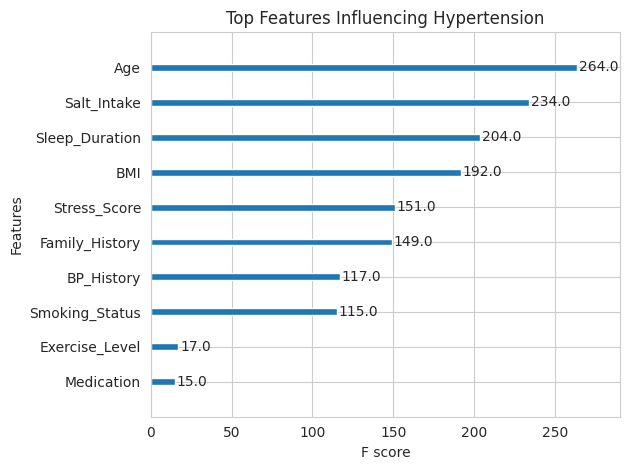

In [22]:
xgb.plot_importance(model, max_num_features=10)
plt.title("Top Features Influencing Hypertension")
plt.tight_layout()
plt.show()


## Logistic Regression Model

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df_log = df.copy()

# Encode categorical variables
for col in ["BP_History", "Medication", "Family_History", "Exercise_Level", "Smoking_Status", "Has_Hypertension"]:
    df_log[col] = LabelEncoder().fit_transform(df_log[col])

# Define features and target
X = df_log.drop(columns=["Has_Hypertension"])
y = df_log["Has_Hypertension"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8110831234256927
Confusion Matrix:
 [[152  40]
 [ 35 170]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       192
           1       0.81      0.83      0.82       205

    accuracy                           0.81       397
   macro avg       0.81      0.81      0.81       397
weighted avg       0.81      0.81      0.81       397



In [26]:
import pandas as pd
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coefficients)


          Feature  Coefficient
7  Family_History     2.361470
9  Smoking_Status     2.335911
3      BP_History    -2.252573
4  Sleep_Duration    -0.366200
2    Stress_Score     0.268972
1     Salt_Intake     0.242009
5             BMI     0.123615
8  Exercise_Level    -0.096192
0             Age     0.049353
6      Medication     0.005477


RANDOM FOREST

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       192
           1       0.98      0.96      0.97       205

    accuracy                           0.97       397
   macro avg       0.97      0.97      0.97       397
weighted avg       0.97      0.97      0.97       397

ROC-AUC Score: 0.9955157520325203


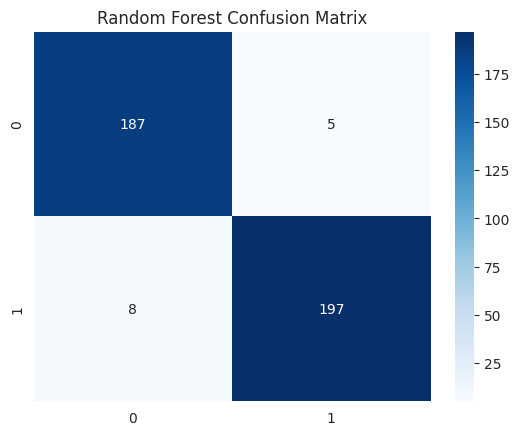

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Train
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()
